In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Correlation between GDP and S&P500**

In this exercise, you want to analyze stock returns from the S&P 500. You believe there may be a relationship between the returns of the S&P 500 and the GDP of the US. Merge the different datasets together to compute the correlation.

Two tables have been provided for you, named `sp500`, and `gdp` being loaded in the first few lines of code in the codecell below.

**Instructions:**
* Use `merge_ordered()` to merge `gdp` and `sp500` using a left join where the year column from `gdp` is matched with the `date` column from `sp500` and assign it to `gdp_sp500`.
* Print `gdp_sp500`.
* Use the `merge_ordered()` function again, similar to before, to merge `gdp` and `sp500`, using the function's ability to fill in missing data for returns by forward-filling the missing values. Assign the resulting table to the variable `gdp_sp500`.
* Subset the `gdp_sp500` table, select the `gdp` and `returns` columns, and save as `gdp_returns`.
* Print the correlation matrix of the `gdp_returns` table using the `.corr()` method.



In [20]:
#Loading DataFrames sp500, and gdp from dataset files
sp500 = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/S%26P500.csv?raw=True')
gdp = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/gdp1.csv?raw=True')

#Exploring the first few rows of the two DataFrames using .head() method
print(sp500.head())
print(gdp.head())


# Use merge_ordered() to merge gdp and sp500 on year and date
gdp_sp500 = pd.merge_ordered(gdp, sp500,left_on="year", right_on="date", how="left")

# Print gdp_sp500
print("\nMerged gdp_sp500 without forward filling:")
print(gdp_sp500)

# Use merge_ordered() to merge gdp and sp500, and forward fill missing values
gdp_sp500_ff = pd.merge_ordered(gdp, sp500, left_on="year", right_on="date", how="left", fill_method="ffill")

# Print gdp_sp500 with forward filling
print("\nMerged gdp_sp500 with forward filling:")
print(gdp_sp500_ff)

# Subset the gdp and returns columns
gdp_returns = gdp_sp500_ff[["gdp", "returns"]]

# Print gdp_returns correlation
print("\nCorrelation matrix between GDP and returns:")
print(gdp_returns.corr())


   Date  Returns
0  2008   -38.49
1  2009    23.45
2  2010    12.78
3  2011     0.00
4  2012    13.41
    Country Name Country Code     Indicator Name  Year           GDP
0          China          CHN  GDP (current US$)  2010  6.087160e+12
1        Germany          DEU  GDP (current US$)  2010  3.417090e+12
2          Japan          JPN  GDP (current US$)  2010  5.700100e+12
3  United States          USA  GDP (current US$)  2010  1.499210e+13
4          China          CHN  GDP (current US$)  2011  7.551500e+12


KeyError: 'date'

# **Phillips curve using `merge_ordered()`**

There is an economic theory developed by A. W. Phillips which states that inflation and unemployment have an inverse relationship. The theory claims that with economic growth comes inflation, which in turn should lead to more jobs and less unemployment.

You will take two tables of data from the U.S. Bureau of Labor Statistics, containing unemployment and inflation data over different periods, and create a Phillips curve. The tables have different frequencies. One table has a data entry every six months, while the other has a data entry every month. You will need to use the entries where you have data within both tables.

The tables `unemployment` and `inflation` have been loaded for you in the first few lines of code in the codecell below.

**Instructions:**
* Use `merge_ordered()` to merge the `inflation` and `unemployment` tables on `date` with an inner join, and save the results as `inflation_unemploy`.
* Print the `inflation_unemploy` dataframe.
* Using `inflation_unemploy`, create a scatter plot with `unemployment_rate` on the horizontal axis and `cpi` (inflation) on the vertical axis.


In [9]:
#Loading DataFrames inflation and unemployment from dataset files

inflation = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/inflation.csv?raw=True')
unemployment = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/unemployment.csv?raw=True')

#Exploring the first few rows of the two DataFrames using .head() method
print(inflation.head())
print(unemployment.head())

# Use merge_ordered() to merge inflation, unemployment with inner join
inflation_unemploy = pd.merge_ordered(inflation,unemployment,on="data", how="inner")

# Print inflation_unemploy
print("\nMerged DataFrame:")
print(inflation_unemploy)

# Plot a scatter plot of unemployment_rate vs cpi
inflation_unemploy.plot.scatter(x="cpi", y="unemployment_rate", title="Unemployment Rate vs CPI")

# Show the plot
plt.show()



         date      cpi     seriesid                  data_type
0  2014-01-01  235.288  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
1  2014-02-01  235.547  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
2  2014-03-01  236.028  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
3  2014-04-01  236.468  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
4  2014-05-01  236.918  CUSR0000SA0  SEASONALLY ADJUSTED INDEX
         date  unemployment_rate
0  2013-06-01                7.5
1  2014-01-01                6.7
2  2014-06-01                6.1
3  2015-01-01                5.6
4  2015-06-01                5.3


KeyError: 'data'

In [ ]:
#Loading gdp and pop DataFrames from dataset files
gdp = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/gdp2.csv?raw=True')
pop = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/pop1.csv?raw=True')

#Exploring the first few rows of the two DataFrames using .head() method
print(gdp.head())
print(pop.head())

# Merge gdp and pop on date and country with fill and notice rows 2 and 3
ctry_date = pd.merge_ordered(____,
                             fill_method='ffill')

# Print ctry_date
print(ctry_date)

# Merge gdp and pop on country and date with fill
date_ctry = ____

# Print date_ctry
print(date_ctry)


# **`merge_ordered()` caution, multiple columns**

When using `merge_ordered()` to merge on multiple columns, the order is important when you combine it with the forward fill feature. The function sorts the merge on columns in the order provided. In this exercise, we will merge GDP and population data from the World Bank for Australia and Sweden, reversing the order of the merge on columns. The frequency of the series are different, the GDP values are quarterly, and the population is yearly. Use the forward fill feature to fill in the missing data. Depending on the order provided, the fill forward will use unintended data to fill in the missing values.

The tables `gdp` and `pop` have been loaded in the first few lines of code in the codecell below.

**Instructions:**
1. Use `merge_ordered()` on `gdp` and `pop`, merging on columns `date` and `country` with the fill feature, save to `ctry_date`.

2. Perform the same merge of `gdp` and `pop`, but join on `country` and `date` (reverse of step 1) with the fill feature, saving this as `date_ctry`.


# **Using `merge_asof()` to study stocks**

You have a feed of stock market prices that you record. You attempt to track the price every five minutes. Still, due to some network latency, the prices you record are roughly every 5 minutes. You pull your price logs for three banks, JP Morgan (JPM), Wells Fargo (WFC), and Bank Of America (BAC). You want to know how the price change of the two other banks compare to JP Morgan. Therefore, you will need to merge these three logs into one table. Afterward, you will use the pandas `.diff()` method to compute the price change over time. Finally, plot the price changes so you can review your analysis.

The three log files have been loaded for you as tables named `jpm`, `wells`, and `bac`.

Instructions:
* Use `merge_asof()` to merge `jpm` (left table) and `wells` together on the `date_time` column, where the rows with the nearest times are matched, and with `suffixes=('', '_wells')`. Save to `jpm_wells`.
* Use `merge_asof()` to merge `jpm_wells` (left table) and `bac` together on the `date_time` column, where the rows with the closest times are matched, and with `suffixes=('_jpm', '_bac')`. Save to `jpm_wells_bac`.
* Plot the close prices of `close_jpm`, `close_wells`, and `close_bac` from `price_diffs`.


             date_time  close
0  2017-11-17 15:35:17  98.12
1  2017-11-17 15:40:04  98.18
2  2017-11-17 15:45:01  97.73
3  2017-11-17 15:50:55  97.74
4  2017-11-17 15:55:00  97.82
             date_time  close
0  2017-11-17 15:35:08  54.32
1  2017-11-17 15:40:00  54.32
2  2017-11-17 15:45:32  54.19
3  2017-11-17 15:50:07  54.17
4  2017-11-17 15:55:00  54.18
             date_time  close
0  2017-11-17 15:35:17  26.55
1  2017-11-17 15:40:06  26.55
2  2017-11-17 15:45:05  26.39
3  2017-11-17 15:50:34  26.38
4  2017-11-17 15:55:06  26.38


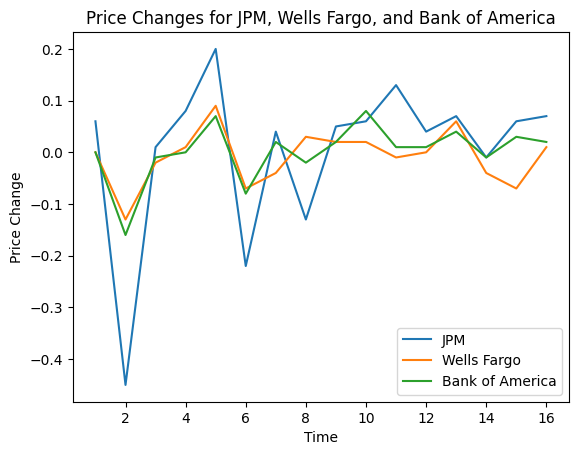

In [23]:
#Loading jpm, wells, and bac DataFrames from dataset files
jpm = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/jpm.csv?raw=True')
wells = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/wells.csv?raw=True')
bac = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/bac.csv?raw=True')

#Exploring the first few rows of the three DataFrames using .head() method
print(jpm.head())
print(wells.head())
print(bac.head())

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

# Assuming jpm, wells, and bac have already been loaded

# Convert 'date_time' columns to datetime if they are not already
jpm['date_time'] = pd.to_datetime(jpm['date_time'])
wells['date_time'] = pd.to_datetime(wells['date_time'])
bac['date_time'] = pd.to_datetime(bac['date_time'])

# Merging JPM and Wells Fargo logs on 'date_time' using merge_asof
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', direction='nearest', suffixes=('', '_wells'))

# Merging the previous result with BAC logs on 'date_time' using merge_asof
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', direction='nearest', suffixes=('_jpm', '_bac'))

# Compute the price change using .diff() method
price_diffs = jpm_wells_bac[['date_time', 'close_jpm', 'close_wells', 'close_bac']].diff()

# Plot the price changes
import matplotlib.pyplot as plt

plt.plot(price_diffs['close_jpm'], label='JPM')
plt.plot(price_diffs['close_wells'], label='Wells Fargo')
plt.plot(price_diffs['close_bac'], label='Bank of America')

plt.xlabel('Time')
plt.ylabel('Price Change')
plt.legend()
plt.title('Price Changes for JPM, Wells Fargo, and Bank of America')
plt.show()



# **Using `merge_asof()` to create dataset**

The `merge_asof()` function can be used to create datasets where you have a table of start and stop dates, and you want to use them to create a flag in another table. You have been given `gdp`, which is a table of quarterly GDP values of the US during the 1980s. Additionally, the table `recession` has been given to you. It holds the starting date of every US recession since 1980, and the date when the recession was declared to be over. Use `merge_asof()` to merge the tables and create a status flag if a quarter was during a recession. Finally, to check your work, plot the data in a bar chart.

The tables `gdp` and `recession` have been loaded for you in the first few lines of code.

**Instructions:**
* Using `merge_asof()`, merge `gdp` and `recession` on `date`, with `gdp` as the left table. Save to the variable `gdp_recession`.
* Create a list using a list comprehension and a conditional expression, named `is_recession`, where for each row if the `gdp_recession['econ_status']` value is equal to `'recession'` then enter `'r'` else `'g'`.
* Using `gdp_recession`, plot a bar chart of `gdp` versus `date`, setting the color argument equal to `is_recession`.


         date       gdp
0  1979-01-01  2526.610
1  1979-04-01  2591.247
2  1979-07-01  2667.565
3  1979-10-01  2723.883
4  1980-01-01  2789.842
         date econ_status
0  1980-01-01   recession
1  1980-08-01      normal
2  1981-07-01   recession
3  1982-12-01      normal
4  1990-07-01   recession


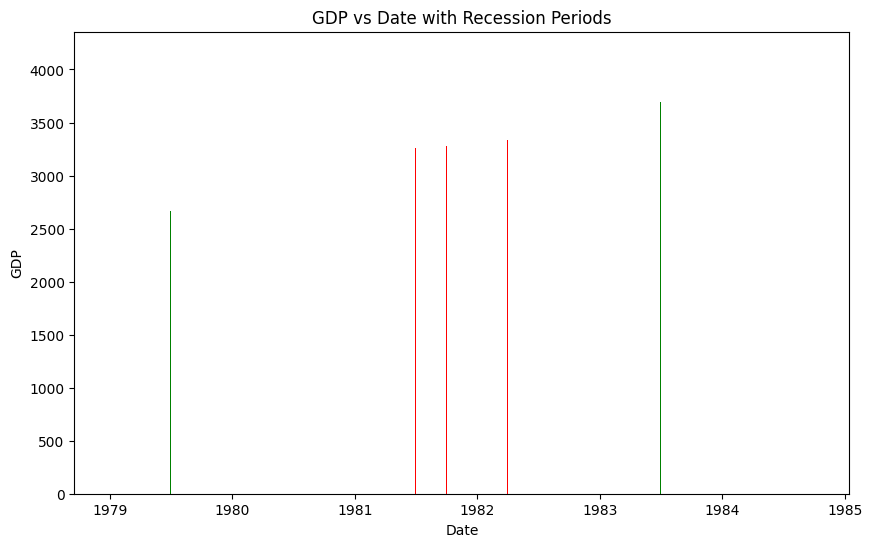

In [24]:
#Loading gdp and recession DataFrames from dataset files
gdp = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/gdp3.csv?raw=True')
recession = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/recession.csv?raw=True')

#Exploring the first few rows of the two DataFrames using .head() method
print(gdp.head())
print(recession.head())

gdp['date'] = pd.to_datetime(gdp['date'])
recession['date'] = pd.to_datetime(recession['date'])

# Step 1: Merge gdp and recession on date using merge_asof
# Merge the tables based on date, using gdp as the left table
gdp_recession = pd.merge_asof(gdp, recession, on='date', direction='backward')

# Step 2: Create a list 'is_recession' to flag recession periods
# If econ_status is 'recession', mark 'r', else 'g' for growth
is_recession = ['r' if status == 'recession' else 'g' for status in gdp_recession['econ_status']]

# Step 3: Plot a bar chart of GDP vs. date, with color based on is_recession
plt.figure(figsize=(10, 6))
plt.bar(gdp_recession['date'], gdp_recession['gdp'], color=is_recession)

# Set labels and title
plt.xlabel('Date')
plt.ylabel('GDP')
plt.title('GDP vs Date with Recession Periods')

# Show the plot
plt.show()


# **Subsetting rows with `.query()`**

In this exercise, you will revisit GDP and population data for Australia and Sweden from the World Bank and expand on it using the `.query()` method. You'll merge the two tables and compute the GDP per capita. Afterwards, you'll use the `.query()` method to sub-select the rows and create a plot. Recall that you will need to merge on multiple columns in the proper order.

The tables gdp and pop have been loaded for you in one of the previous codecells.

Instructions:
* Use `merge_ordered()` on `gdp` and `pop` on columns `country` and `date` with the fill feature, save to `gdp_pop` and print.
* Add a column named `gdp_per_capita` to `gdp_pop` that divides `gdp` by `pop`.
* Pivot `gdp_pop` so `values='gdp_per_capita'`, `index='date'`, and `columns='country'`, save as `gdp_pivot`.
* Use `.query()` to select rows from `gdp_pivot` where `date` is greater than equal to `"1991-01-01"`. Save as `recent_gdp_pop`.




In [30]:
# Merge gdp and pop on date and country with fill and print gdp_pop
import pandas as pd

# Assuming you have the gdp and pop data loaded already
gdp = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/gdp2.csv?raw=True')
pop = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/pop1.csv?raw=True')



# Merge the gdp and pop data using merge_ordered
gdp_pop = pd.merge_ordered(gdp, pop, on=['country', 'date'], fill_method='ffill')
print(gdp_pop)

# Add the gdp_per_capita column to gdp_pop
gdp_pop['gdp_per_capita'] = gdp_pop['gdp'] / gdp_pop['pop']

# Pivot the gdp_pop DataFrame
gdp_pivot = gdp_pop.pivot_table(values='gdp_per_capita', index='date', columns='country')
print(gdp_pivot)

# Use the .query() method to select rows where date is greater than or equal to "1991-01-01"
recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')
print(recent_gdp_pop)



          date    country         gdp  series_code_x       pop series_code_y
0   1990-01-01  Australia  158051.132  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
1   1990-04-01  Australia  158263.582  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
2   1990-07-01  Australia  157329.279  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
3   1990-09-01  Australia  158240.678  NYGDPMKTPSAKD  17065100   SP.POP.TOTL
4   1991-01-01  Australia  156195.954  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
5   1991-04-01  Australia  155989.033  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
6   1991-07-01  Australia  156635.858  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
7   1991-09-01  Australia  156744.057  NYGDPMKTPSAKD  17284000   SP.POP.TOTL
8   1992-01-01  Australia  157916.081  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
9   1992-04-01  Australia  159047.827  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
10  1992-07-01  Australia  160658.176  NYGDPMKTPSAKD  17495000   SP.POP.TOTL
11  1992-09-01  Australia  163960.221  NYGDPMKTPSAKD  17495000   SP.POP.TOTL

# **Using `.melt()` to reshape government data**

The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. In this exercise, you will reshape a table of US unemployment rate data from the BLS into a form you can plot using `.melt()`. You will need to add a `date` column to the table and sort by it to plot the data correctly.

The unemployment rate data has been loaded for you in a table called `ur_wide`. You are encouraged to explore this table before beginning the exercise.

**Instructions:**
* Use `.melt()` to unpivot all of the columns of `ur_wide` except `year` and ensure that the columns with the months and values are named `month` and `unempl_rate`, respectively. Save the result as `ur_tall`.
* Add a column to `ur_tall` named `date` which combines the year and month columns as `year-month` format into a larger string, and converts it to a `date` data type.
* Sort `ur_tall` by `date` and save as `ur_sorted`.
* Using `ur_sorted`, plot `unempl_rate` on the y-axis and `date` on the x-axis.


   year  jan  feb  mar  apr  may  jun  jul  aug  sep  oct  nov  dec
0  2010  9.8  9.8  9.9  9.9  9.6  9.4  9.4  9.5  9.5  9.4  9.8  9.3
1  2011  9.1  9.0  9.0  9.1  9.0  9.1  9.0  9.0  9.0  8.8  8.6  8.5
2  2012  8.3  8.3  8.2  8.2  8.2  8.2  8.2  8.1  7.8  7.8  7.7  7.9
3  2013  8.0  7.7  7.5  7.6  7.5  7.5  7.3  7.2  7.2  7.2  6.9  6.7
4  2014  6.6  6.7  6.7  6.2  6.3  6.1  6.2  6.1  5.9  5.7  5.8  5.6


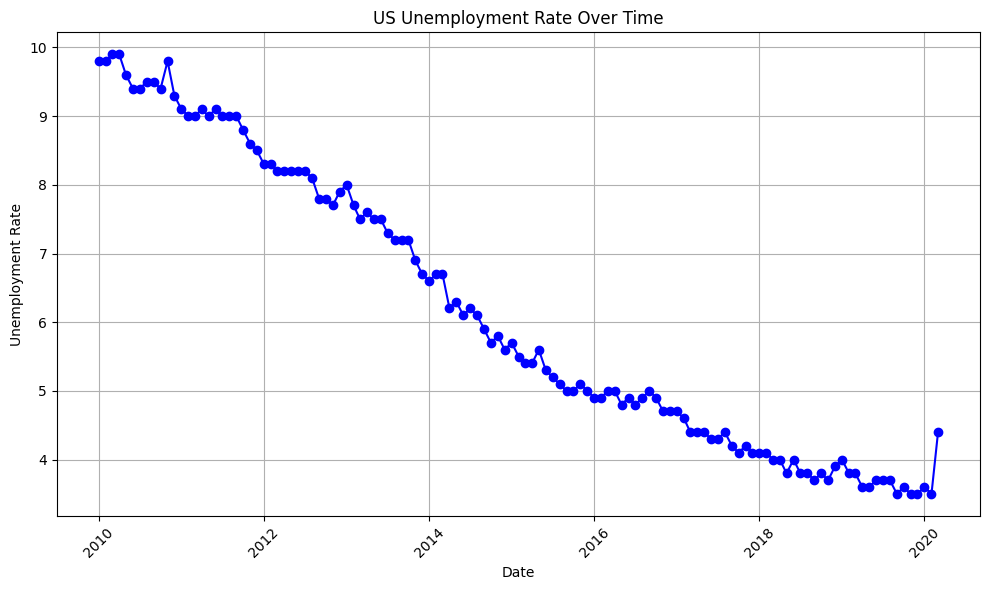

In [33]:
#Loading ur_wide DataFrame from dataset file
ur_wide = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/ur_wide.csv?raw=True')

#Exploring the first few rows of the ur_wide DataFrame using .head() method
print(ur_wide.head())

# unpivot everything besides the year column
ur_tall = ur_wide.melt(id_vars=['year'], var_name='month', value_name='unempl_rate')


# Create a 'year-month' column in string format and convert it to datetime
ur_tall['date'] = pd.to_datetime(ur_tall['year'].astype(str) + '-' + ur_tall['month'], format='%Y-%b')

# Step 3: Sort the data by the 'date' column
ur_sorted = ur_tall.sort_values(by='date')

# Step 4: Plot the data
plt.figure(figsize=(10, 6))
plt.plot(ur_sorted['date'], ur_sorted['unempl_rate'], marker='o', linestyle='-', color='b')

# Add titles and labels
plt.title('US Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


# **Using `.melt()` for stocks vs bond performance**

It is widespread knowledge that the price of bonds is inversely related to the price of stocks. In this last exercise, you'll review many of the topics in this chapter to confirm this. You have been given a table of percent change of the US 10-year treasury bond price. It is in a wide format where there is a separate column for each year. You will need to use the `.melt()` method to reshape this table.

Additionally, you will use the `.query()` method to filter out unneeded data. You will merge this table with a table of the percent change of the Dow Jones Industrial stock index price. Finally, you will plot data.

The tables `ten_yr` and `dji` have been loaded for you in the first few lines of code.

**Instructions:**
* Use `.melt()` on `ten_yr` to unpivot everything except the `metric` column, setting `var_name='date'` and `value_name='close'`. Save the result to `bond_perc`.
* Using the `.query()` method, select only those rows where `metric` equals `'close'`, and save to `bond_perc_close`.
* Use `merge_ordered()` to merge `dji` (left table) and `bond_perc_close` on `date` with an inner join, and set suffixes equal to `('_dow', '_bond')`. Save the result to `dow_bond`.
* Using `dow_bond`, plot only the `Dow` and `bond` values.


  metric  2007-02-01  2007-03-01  2007-04-01  2007-05-01  2007-06-01  \
0   open       0.033      -0.060       0.025      -0.004       0.061   
1   high      -0.007      -0.041       0.022       0.031       0.080   
2    low      -0.016      -0.008       0.031      -0.002       0.059   
3  close      -0.057       0.022      -0.004       0.056       0.029   

   2007-07-01  2007-08-01  2007-09-01  2007-10-01  ...  2009-03-01  \
0       0.027      -0.059      -0.046       0.014  ...       0.046   
1      -0.022      -0.060      -0.038       0.004  ...      -0.004   
2      -0.027      -0.052      -0.043       0.003  ...      -0.062   
3      -0.052      -0.049       0.009      -0.023  ...      -0.117   

   2009-04-01  2009-05-01  2009-06-01  2009-07-01  2009-08-01  2009-09-01  \
0      -0.103       0.191       0.107       0.024      -0.007      -0.047   
1       0.041       0.187       0.068      -0.062       0.032      -0.090   
2       0.069       0.168       0.123      -0.055       0

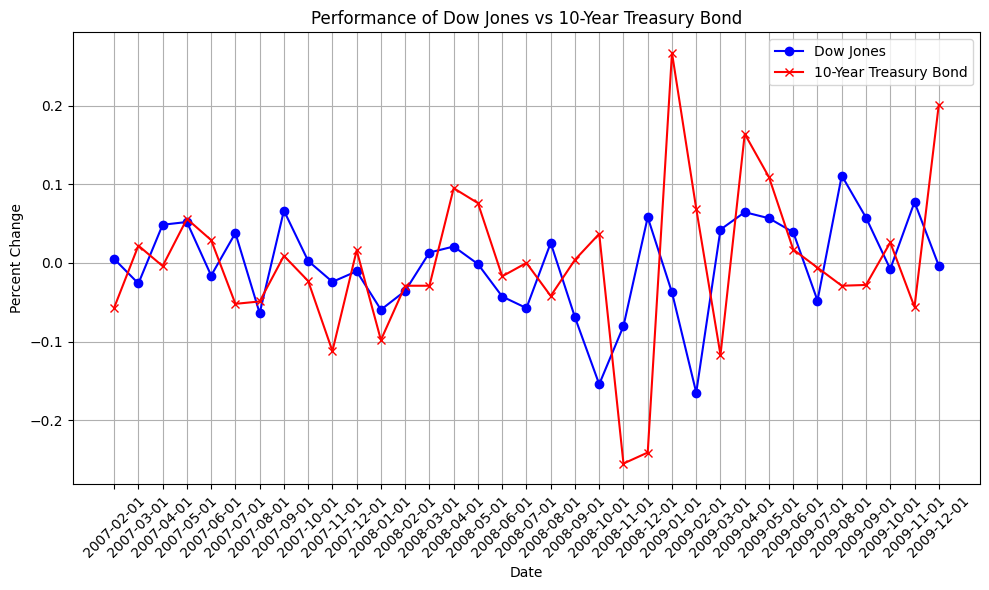

In [35]:
#Loading ten_yr and dji DataFrames from dataset files
from pandas import merge_ordered
ten_yr = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/ten_yr.csv?raw=True')
dji = pd.read_csv('https://github.com/DataAnalyst21/DatasetsForDataAnalytics/blob/main/dji.csv?raw=True')

#Exploring the first few rows of the two DataFrames using .head() method
print(ten_yr.head())
print(dji.head())


# Use melt on ten_yr, unpivot everything besides the metric column
bond_perc = ten_yr.melt(id_vars=['metric'], var_name='date', value_name='close')

# Step 2: Filter using .query() to select rows where `metric == 'close'`
bond_perc_close = bond_perc.query("metric == 'close'")

# Step 3: Merge `dji` and `bond_perc_close` using merge_ordered() with an inner join
dow_bond = merge_ordered(dji, bond_perc_close, on='date', how='inner', suffixes=('_dow', '_bond'))

# Step 4: Plot the Dow and bond values
plt.figure(figsize=(10, 6))

# Plotting Dow Jones
plt.plot(dow_bond['date'], dow_bond['close_dow'], label='Dow Jones', color='blue', linestyle='-', marker='o')

# Plotting 10-Year Treasury Bonds
plt.plot(dow_bond['date'], dow_bond['close_bond'], label='10-Year Treasury Bond', color='red', linestyle='-', marker='x')

# Add labels, title, legend, and grid
plt.title('Performance of Dow Jones vs 10-Year Treasury Bond')
plt.xlabel('Date')
plt.ylabel('Percent Change')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
